In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

Source originates from:
https://www.nber.org/system/files/working_papers/w23429/w23429.pdf

In [2]:
data = yf.download('^HSI', start='2010-01-01', interval='1mo').dropna()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

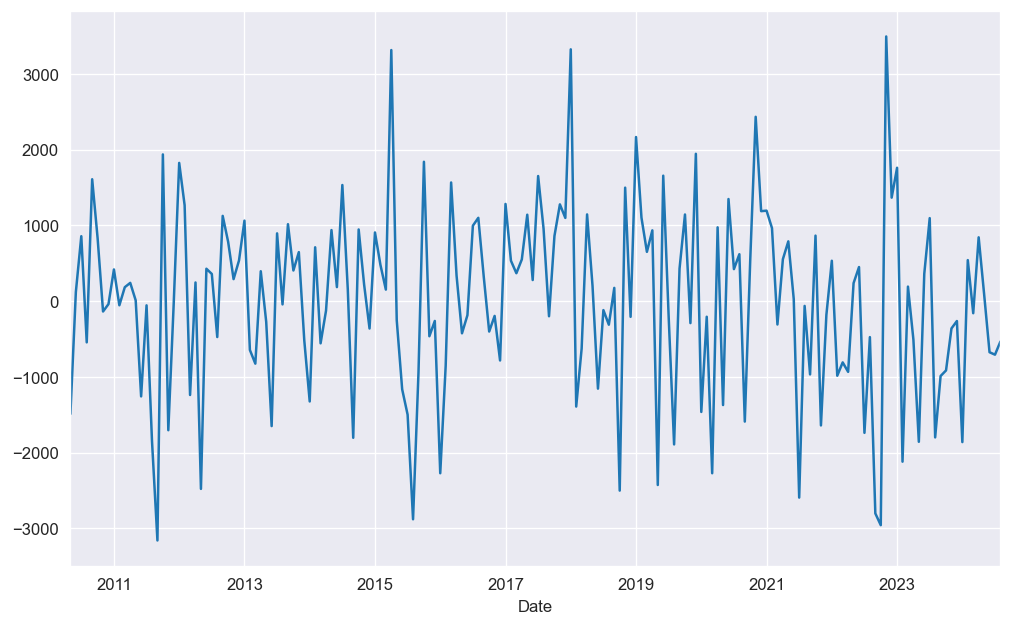

In [79]:
# Define the horizon (h)
h = 4  # You can change this to the desired horizon

# Create lagged variables
data['lag1'] = data['Close'].shift(1)
data['lag2'] = data['Close'].shift(2)
data['lag3'] = data['Close'].shift(3)
data['lag4'] = data['Close'].shift(4)

# Drop rows with NaN values
data = data.dropna()

# Define the dependent and independent variables
X = data[['lag1', 'lag2', 'lag3', 'lag4']]
y = data['Close']

# Add a constant to the independent variables
X = sm.add_constant(X)

# split to train test
x_train = X[:int(X.shape[0]*8)]
y_train = y[:int(X.shape[0]*8)]
x_test = X[int(X.shape[0]*8):]
y_test = y[int(X.shape[0]*8):]

# Fit the regression model
model = sm.OLS(y_train, x_train).fit()

# Make predictions
data['forecast'] = model.predict(sm.add_constant(data[['lag1', 'lag2', 'lag3', 'lag4']]))

# Calculate the forecast error
data['forecast_error'] = data['Close'] - data['forecast']

# The forecast error is the cyclical component
cyclical_component = data['forecast_error']

cyclical_component.plot()

<Axes: xlabel='Date'>

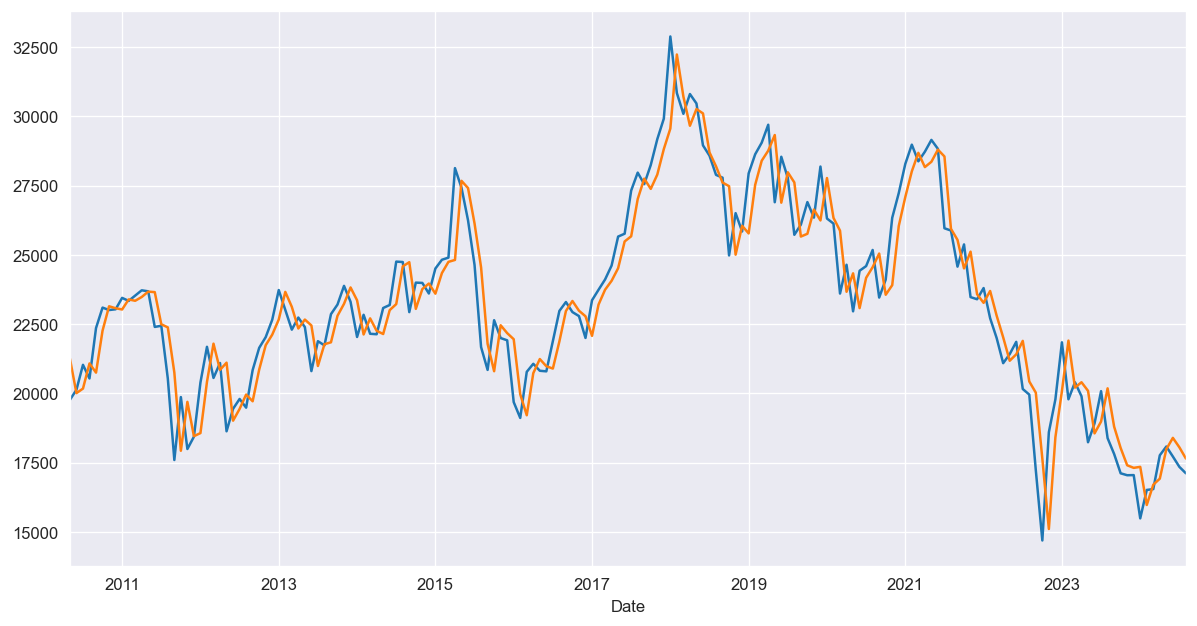

In [80]:
plt.figure(figsize=(12, 6))
data['Close'].plot()
data['forecast'].plot()

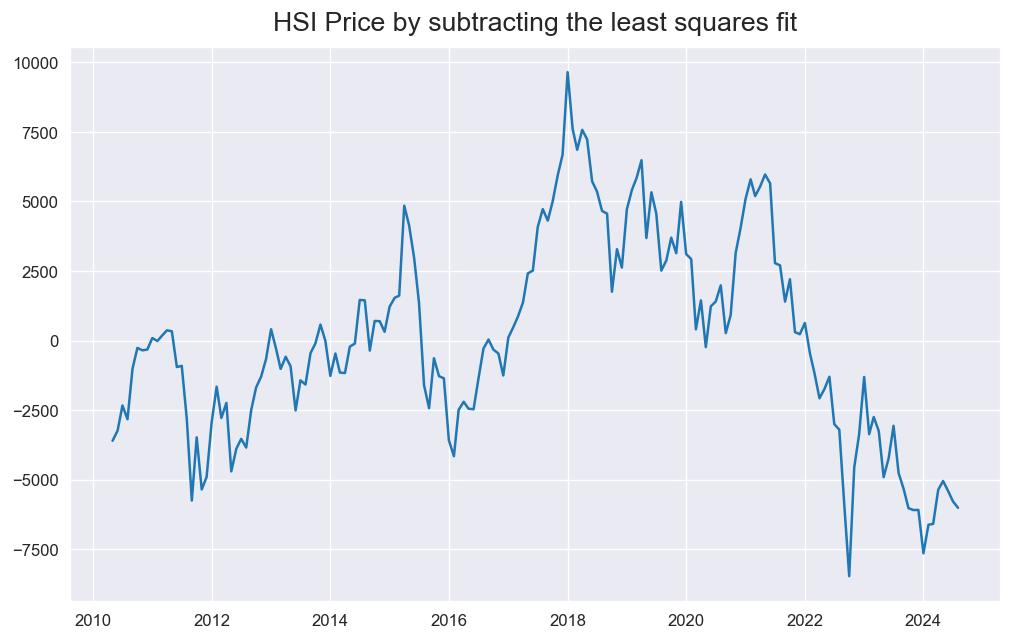

In [81]:
# Using scipy: Subtract the line of best fit
from scipy import signal
de_trended = signal.detrend(data['Close'])
plt.plot(data['Close'].index, de_trended)
plt.title('HSI Price by subtracting the least squares fit', fontsize=16)
plt.show()

Test for seasonality

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

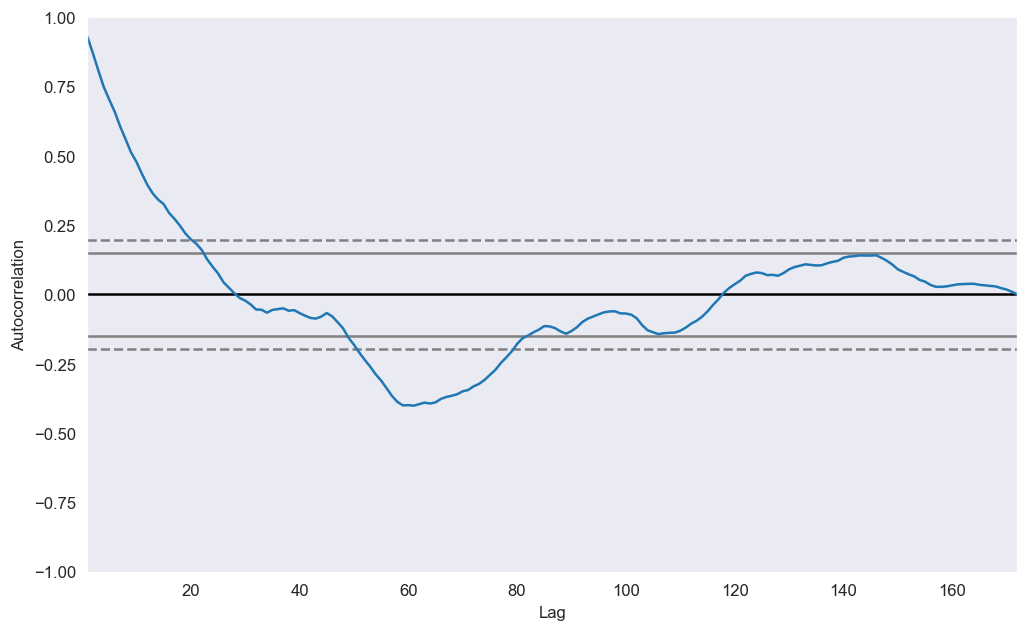

In [82]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(data['Close'])

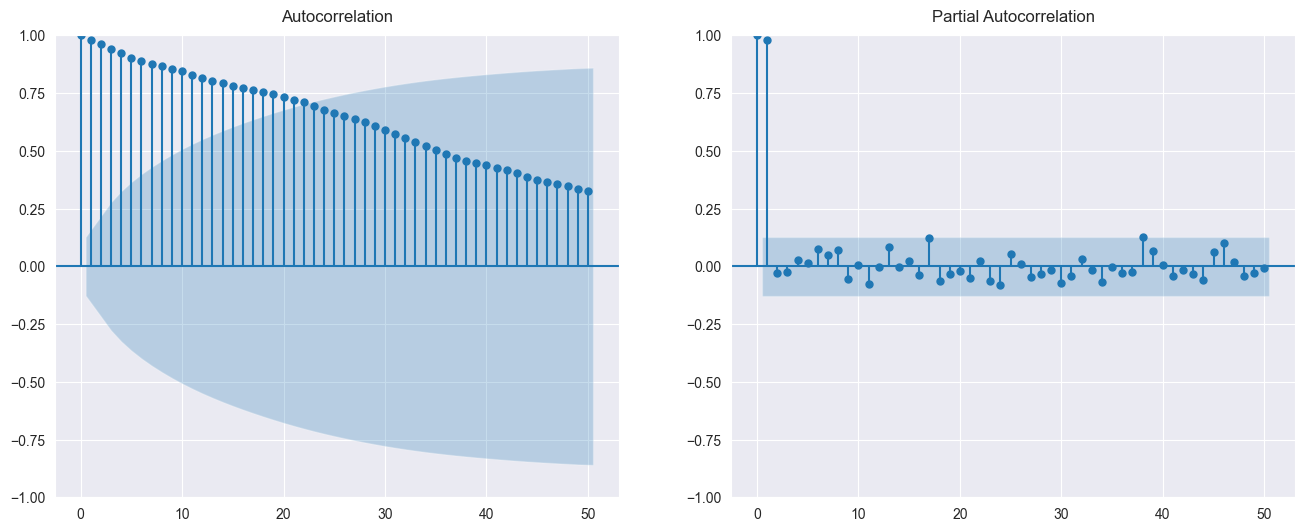

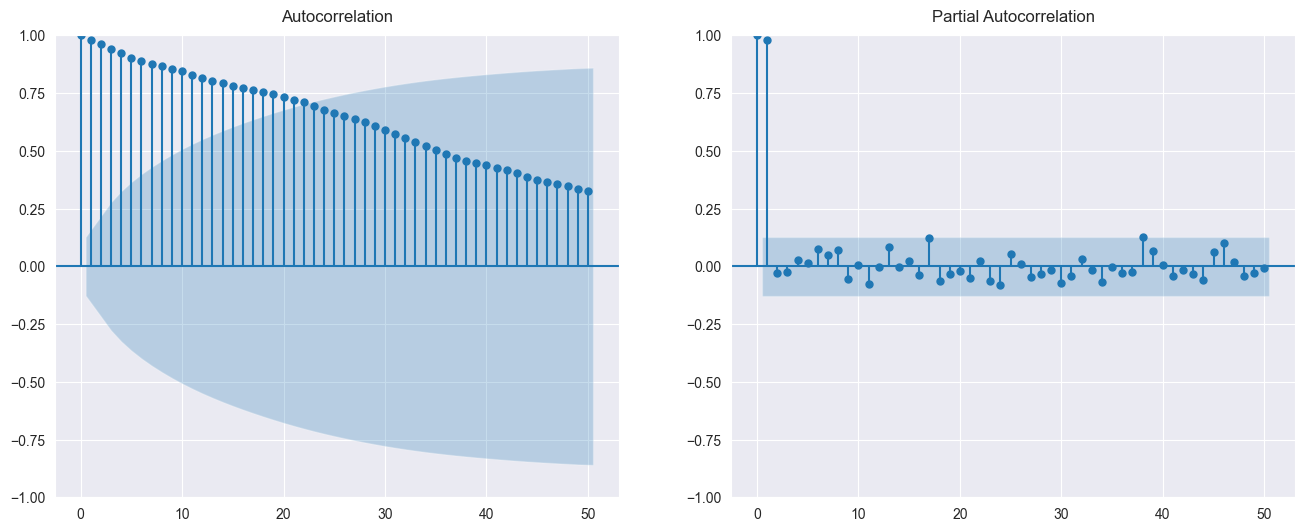

In [66]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,6), dpi= 100)
plot_acf(data['Close'].tolist(), lags=50, ax=axes[0])
plot_pacf(data['Close'].tolist(), lags=50, ax=axes[1])

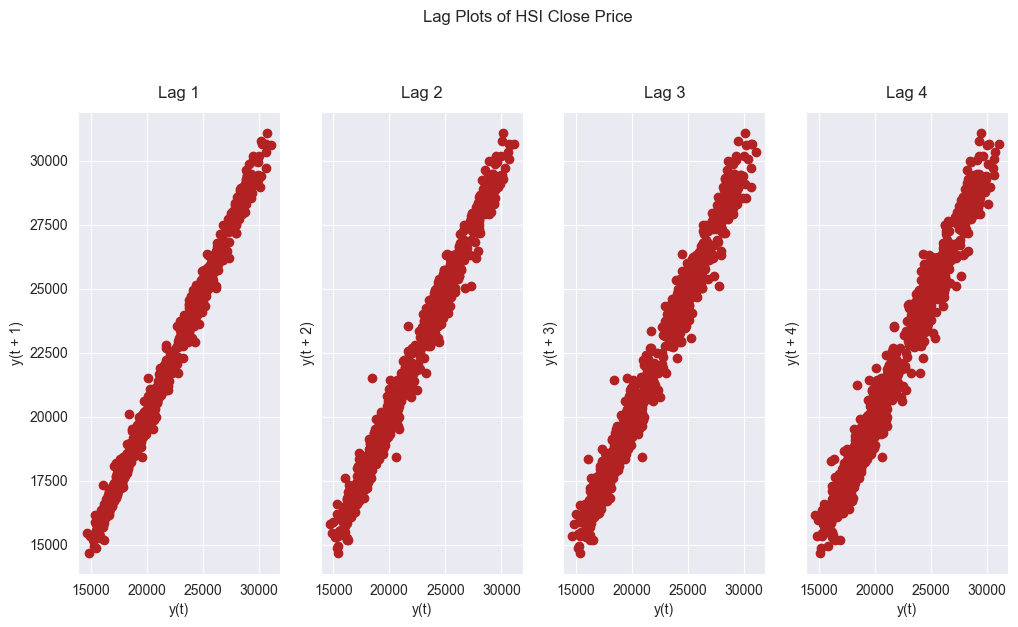

In [59]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(12,6), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(data['Close'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of HSI Close Price', y=1.05)    
plt.show()

In [4]:
hsi = yf.download('^HSI', start='1987-01-01')

[*********************100%%**********************]  1 of 1 completed


In [106]:
# rets = hsi['Close'][hsi.index >= '2020-01-01'].pct_change().dropna()
rets = hsi['Close'][hsi.index >= '1987-01-01'].pct_change().dropna()

In [99]:
neg_rets = rets[rets <= 0]
pos_rets = rets[rets > 0]

In [100]:
table1 = pos_rets.groupby(pos_rets.index.month).describe()
pos_rets.groupby([pos_rets.index.year, pos_rets.index.month]).describe()['count'] / rets.groupby([rets.index.year, rets.index.month]).describe()['count']

Date  Date
2020  1       0.421053
      2       0.550000
      3       0.409091
      4       0.578947
      5       0.450000
      6       0.571429
      7       0.545455
      8       0.476190
      9       0.409091
      10      0.611111
      11      0.714286
      12      0.545455
2021  1       0.600000
      2       0.722222
      3       0.521739
      4       0.578947
      5       0.550000
      6       0.333333
      7       0.380952
      8       0.454545
      9       0.523810
      10      0.555556
      11      0.409091
      12      0.590909
2022  1       0.523810
      2       0.411765
      3       0.434783
      4       0.555556
      5       0.550000
      6       0.523810
      7       0.350000
      8       0.478261
      9       0.238095
      10      0.300000
      11      0.500000
      12      0.550000
2023  1       0.666667
      2       0.250000
      3       0.565217
      4       0.588235
      5       0.428571
      6       0.523810
      7       0.600000


In [101]:
rets_by_month_dayofweek = rets.groupby([rets.index.month, rets.index.dayofweek]).describe()
rets_by_month_dayofweek.index.names = ['Month', 'DayOfWeek']

In [102]:
pos_rets_by_month_dayofweek = pos_rets.groupby([pos_rets.index.month, pos_rets.index.dayofweek]).describe()
pos_rets_by_month_dayofweek.index.names = ['Month', 'DayOfWeek']
pos_rets_by_month_dayofweek

count      mean       std       min       25%       50%  \
Month DayOfWeek                                                            
1     0           10.0  0.010386  0.007137  0.000371  0.008096  0.010410   
      1            7.0  0.013622  0.010693  0.000648  0.004921  0.013205   
      2           10.0  0.013278  0.013522  0.000625  0.002595  0.007852   
      3           12.0  0.012674  0.009585  0.001131  0.006373  0.010856   
      4           10.0  0.007761  0.006624  0.000529  0.002702  0.005707   
2     0            6.0  0.006295  0.008024  0.000255  0.001210  0.003431   
      1           11.0  0.012131  0.010524  0.002698  0.005517  0.010317   
      2           12.0  0.010470  0.006015  0.002009  0.005614  0.009608   
      3           11.0  0.009187  0.007401  0.002988  0.003955  0.005240   
      4            5.0  0.013582  0.014054  0.001617  0.003087  0.006017   
3     0           10.0  0.007580  0.007450  0.000066  0.001161  0.004731   
      1           14.0  0.015563  0.011864  0.002144  0.008500  0.011139   
      2           13.0  0.023063  0.023968  0.000222  0.012097  0.017042   
      3           10.0  0.019636  0.018848  0.005524  0.009980  0.014669   
      4            8.0  0.013969  0.015487  0.004480  0.005418  0.007187   
4     0            9.0  0.011951  0.008989  0.000445  0.004710  0.016813   
      1           12.0  0.008918  0.008163  0.000908  0.002854  0.005625   
      2           10.0  0.007666  0.007796  0.000177  0.002631  0.004340   
      3           15.0  0.007745  0.005501  0.001434  0.003858  0.006724   
      4            9.0  0.011829  0.012482  0.001941  0.002890  0.006132   
5     0           14.0  0.008802  0.006198  0.000940  0.004554  0.006962   
      1           12.0  0.011596  0.009744  0.000356  0.002299  0.012291   
      2            7.0  0.006145  0.004243  0.000485  0.002484  0.007754   
      3            6.0  0.013670  0.006296  0.007723  0.009448  0.012449   
      4           11.0  0.014493  0.010982  0.000286  0.007090  0.011144   
6     0            8.0  0.014460  0.012825  0.000257  0.003349  0.013128   
      1           13.0  0.010408  0.007316  0.000019  0.005181  0.010847   
      2            9.0  0.012228  0.009494  0.000942  0.005641  0.011402   
      3            8.0  0.007192  0.007076  0.001672  0.002405  0.003547   
      4           11.0  0.012519  0.010961  0.000121  0.006009  0.010664   
7     0            9.0  0.014815  0.011705  0.001738  0.006243  0.012528   
      1            9.0  0.013694  0.012528  0.001041  0.005650  0.009746   
      2            9.0  0.008928  0.006693  0.000145  0.004456  0.010778   
      3           12.0  0.013921  0.011155  0.002198  0.003016  0.011165   
      4           10.0  0.007850  0.007533  0.000300  0.003397  0.005897   
8     0           10.0  0.006449  0.005381  0.000463  0.001933  0.005853   
      1            9.0  0.013849  0.008166  0.000791  0.009517  0.013291   
      2           12.0  0.005440  0.004661  0.000218  0.002827  0.004296   
      3            7.0  0.016684  0.012914  0.000116  0.007601  0.020523   
      4            9.0  0.007975  0.005924  0.000461  0.004640  0.006106   
9     0            5.0  0.010375  0.009149  0.000687  0.005590  0.010101   
      1            9.0  0.005052  0.004453  0.000290  0.001411  0.003753   
      2            5.0  0.005939  0.002894  0.001082  0.005769  0.006657   
      3            4.0  0.005226  0.004597  0.002149  0.002328  0.003403   
      4            9.0  0.014160  0.009278  0.003318  0.007478  0.010253   
10    0            9.0  0.007579  0.008522  0.000195  0.001520  0.003110   
      1            7.0  0.008836  0.006068  0.001112  0.005179  0.008410   
      2            8.0  0.015027  0.018275  0.000706  0.007024  0.010481   
      3            5.0  0.011899  0.012843  0.001048  0.001281  0.007199   
      4            8.0  0.010997  0.005912  0.004205  0.005471  0.010782   
11    0           10.0  0.013132  0.007656  0.001310  0.009394  0

<Axes: xlabel='Month,DayOfWeek'>

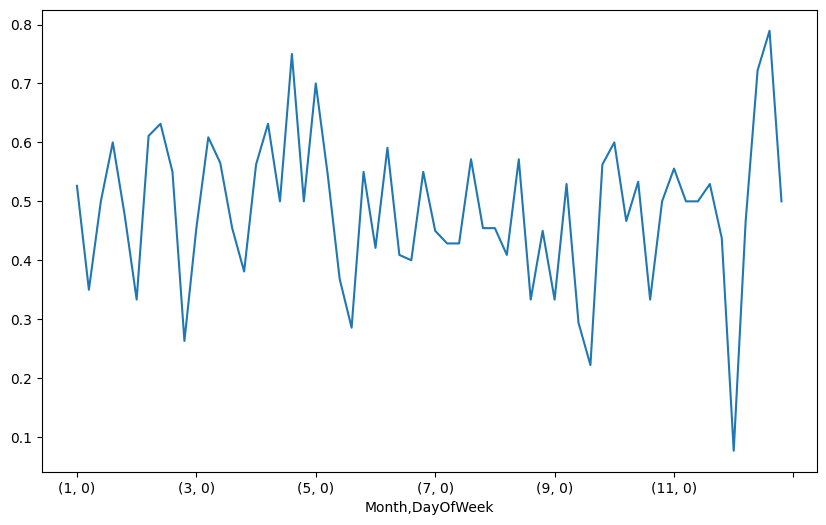

In [103]:
winrate_by_month_dayofweek = pos_rets_by_month_dayofweek['count'] / rets_by_month_dayofweek['count']
plt.figure(figsize=(10, 6))
winrate_by_month_dayofweek.plot()

In [141]:
def plot_month_week(_rets, start_time = '1900-01-01', end_time = '2024-12-31'):
    _rets = _rets[(_rets.index >= start_time) & (_rets.index <= end_time)]
    _pos_rets = _rets[_rets > 0]
    
    ret_df = _rets.groupby([_rets.index.month, _rets.index.dayofweek]).describe()
    ret_df.index.names = ['Month', 'DayOfWeek']
    
    p_df = _pos_rets.groupby([_pos_rets.index.month, _pos_rets.index.dayofweek]).describe()
    p_df.index.names = ['Month', 'DayOfWeek']
    
    res_df = p_df['count'] / ret_df['count']
    
    res_df.plot()

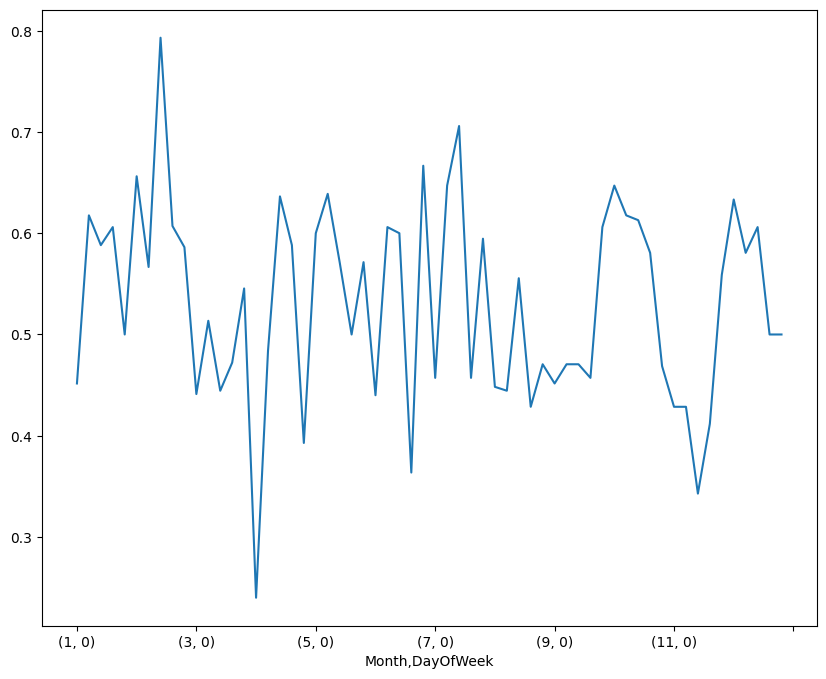

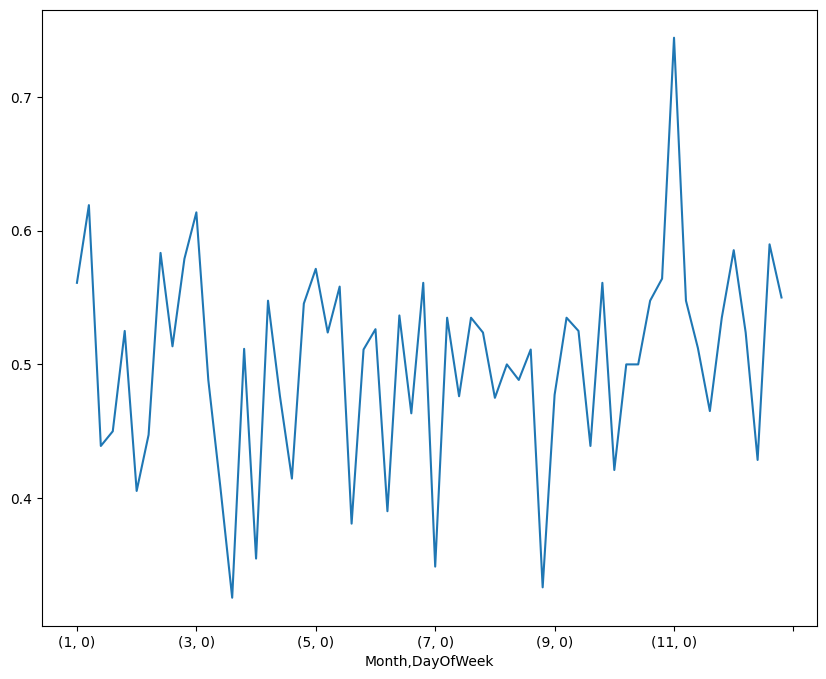

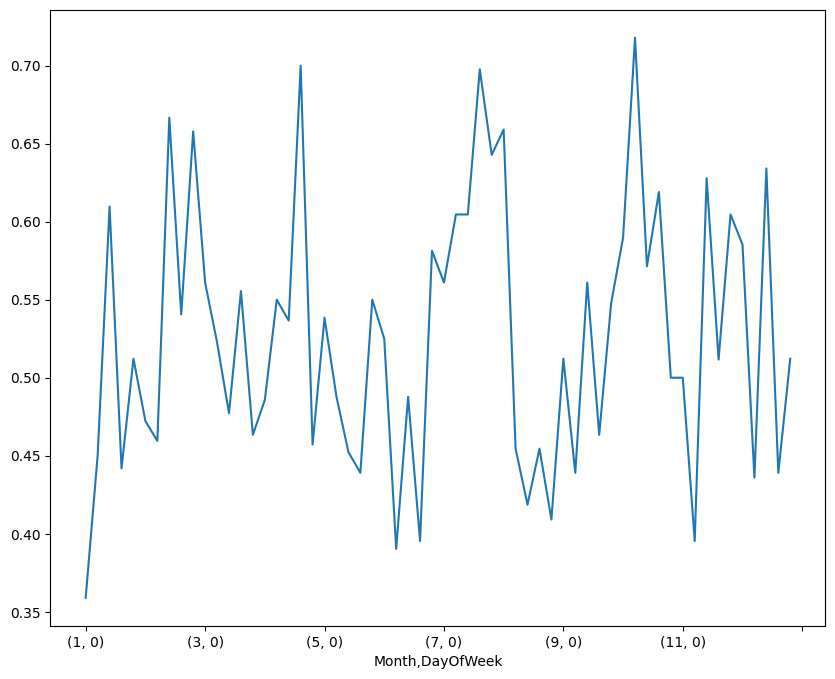

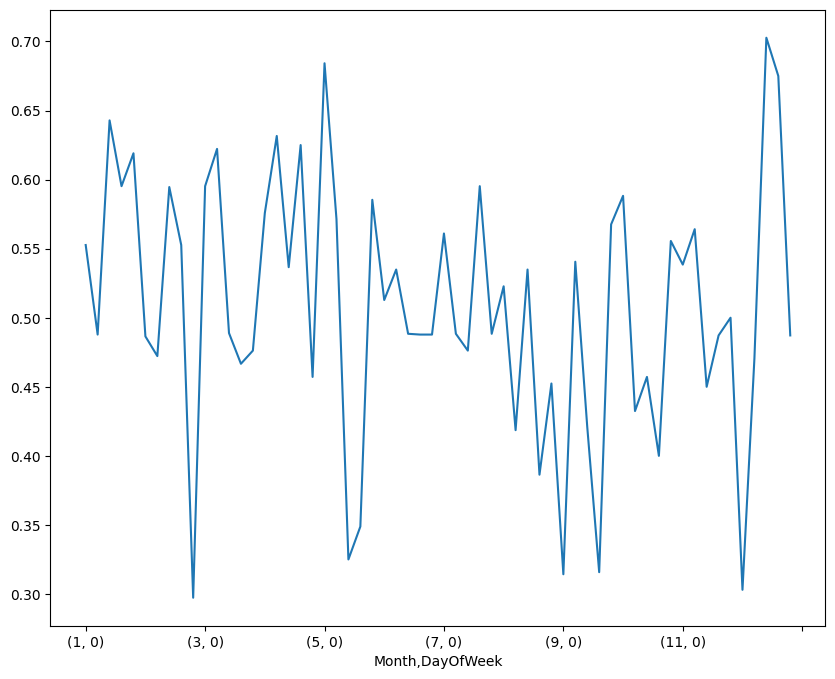

In [145]:
times = ['1987-01-01', '1995-01-01', '2005-01-01', '2015-01-01', '2024-12-31']

for i, t in enumerate(times):
    if i == len(times) - 1:
        break
    plt.figure(figsize=(10, 8))

    plot_month_week(rets, t, times[i + 1])

plt.show()

In [105]:
neg_rets.groupby(neg_rets.index.month).describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
1,51.0,-0.011258,0.009347,-0.037125,-0.016586,-0.008267,-0.003374,-0.000026
2,49.0,-0.010638,0.008806,-0.036375,-0.015358,-0.008179,-0.003366,-0.000710
3,56.0,-0.017768,0.013571,-0.057168,-0.023813,-0.013980,-0.007031,-0.000261
4,38.0,-0.011745,0.008609,-0.037269,-0.017511,-0.010266,-0.005756,-0.000071
5,52.0,-0.012405,0.010959,-0.055597,-0.018183,-0.011392,-0.004567,-0.000329
6,54.0,-0.008512,0.007684,-0.033871,-0.011199,-0.006262,-0.001960,-0.000045
7,56.0,-0.012680,0.009826,-0.042222,-0.018394,-0.012437,-0.003890,-0.000035
8,59.0,-0.008479,0.006755,-0.024673,-0.012788,-0.006857,-0.003249,-0.000063
9,51.0,-0.011172,0.007826,-0.034122,-0.015262,-0.010432,-0.004703,-0.000288
